In [1]:
import pickle
import pandas as pd
from xgboost import XGBClassifier
from utils import create_pipe
from sklearn.metrics import plot_confusion_matrix

In [2]:
#load data

path="../data/combined.pickle"

try:
    with open(path,'rb') as handle:
        pickleload=pickle.load(handle)
except FileNotFoundError as e:
    e.strerror = "Pls run 01_scrape_reddit first to pull the data and 02_EDA to merge data."
    raise e

df=pd.DataFrame(pickleload)

### Prepare the dataset

In [3]:
X=df['post']
y=df['label']

In [4]:
c={
        'cls':XGBClassifier(subsample_bytree= 0.9, max_depth= 6, gamma= 1, eta= 0.12),
        'name':'XGBoost',
        'tvec_params':{'min_df': 0.05, 'max_features': 3500, 'max_df': 0.8,'use_idf': False, 'ngram_range': (1, 2)},
    }

In [5]:
pipe=create_pipe(c['cls'],tfidf=True,**c['tvec_params'])

In [10]:
_=pipe.fit(X,y)

[09:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "subsample_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\Gary\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


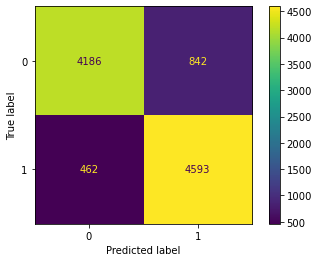

In [7]:
plot_confusion_matrix(pipe,X,y)

Looking at the TP/FP/TN/FN rates, they aren't that bad actually.  
Looks pretty good.

Let's test a sample post on subreddit Aethiest, which was not used to train the model on.

In [8]:
sample="""
Girlfriend of 3 years just gave me an ultimatum
For context, when we first started dating she was in a stage in her life where she was fairly ‘loose’ with her faith (Christianity). Early on, we both acknowledged and accepted each other’s beliefs, or my lack of, and I thought that was the end of it. I mean couples don’t always share the same religious beliefs right?
"""

df_test=pd.DataFrame([sample])

In [9]:
result=pipe.predict(df_test[0])
if result[0]==1:
    print("Prediction is christian")
else:
    print("Prediction is aethiest")        

Prediction is aethiest


And that is correct!